# Parent - Child (all Gaussians)

### mean of Child is derived from the Parent Gaussian

the trick used here is that fitting the child data for only the mean and the scale and not the whole child data

## mean is fixed

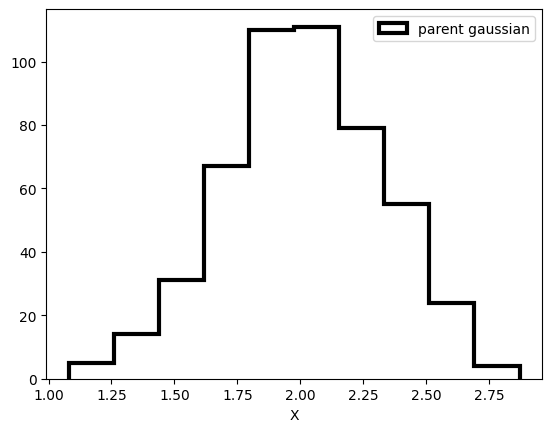

In [8]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent = 2
true_scale_parent = 0.32
true_scale_child = 0.01
N_obs, size_child = 500, 50

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu, sigma):
    return np.random.normal(loc=mu, scale=sigma, size=N_obs)

parent_data = gen_parent_data(true_mean_parent, true_scale_parent)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian')
plt.xlabel("X")
plt.legend()

(array([  5.,  14.,  31.,  67., 110., 111.,  79.,  55.,  24.,   4.]),
 array([1.07991386, 1.25899087, 1.43806788, 1.61714489, 1.7962219 ,
        1.97529891, 2.15437592, 2.33345293, 2.51252994, 2.69160694,
        2.87068395]),
 [<matplotlib.patches.Polygon at 0x7f521fa5bcd0>])

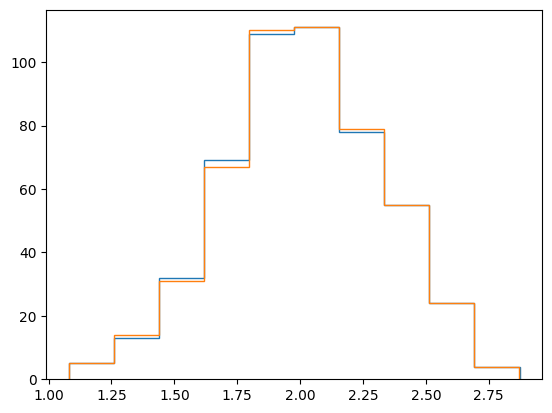

In [9]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step')

In [10]:
def log_liklihood(param):
    parent_sigma = param # mu is fixed and so is sigma
    #model = gen_child_data(parent_data=gen_parent_data(parent_mu, parent_sigma))
    model = parent_sigma * np.random.randn(N_obs) + true_mean_parent
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_gaussian_prior(param):
    parent_sigma = param
    if (0 < parent_sigma < 1):
        return 0.0 # log(1) 0
    return -np.inf # log(0) -inf

def log_probability(param):
    lp = log_gaussian_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [11]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_scale_parent]) + 0.1 * np.random.randn(1)
soln = minimize(nll, initial)
parent_sigma_ML = soln.x

print("Maximum likelihood estimates:")
print("sigma = {0:.3f}".format(soln.x[0]))

Maximum likelihood estimates:
sigma = 0.370


In [12]:
import emcee

pos = soln.x[0] + 1e-2 * np.random.randn(50, 1)
nwalkers, ndim = pos.shape

from multiprocessing import Pool

#with Pool() as pool:
sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability#, pool=pool
    )
sampler.run_mcmc(pos, 5000, progress=True)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:07<00:00, 634.63it/s]


State([[0.03006108]
 [0.03472866]
 [0.04426686]
 [0.0344983 ]
 [0.04312738]
 [0.02968405]
 [0.03579753]
 [0.03124899]
 [0.0631341 ]
 [0.03127916]
 [0.04816107]
 [0.06158234]
 [0.03486498]
 [0.02948617]
 [0.04178436]
 [0.03539481]
 [0.03170289]
 [0.03834585]
 [0.0453545 ]
 [0.02992683]
 [0.03995061]
 [0.05221103]
 [0.03472028]
 [0.02655308]
 [0.03726066]
 [0.04996101]
 [0.04425881]
 [0.02553828]
 [0.02929857]
 [0.03839987]
 [0.02884442]
 [0.02687699]
 [0.04045686]
 [0.03515119]
 [0.03861502]
 [0.03557141]
 [0.0270075 ]
 [0.02892071]
 [0.041485  ]
 [0.04631801]
 [0.05824281]
 [0.03478985]
 [0.02614007]
 [0.04152307]
 [0.03449451]
 [0.03426871]
 [0.05181273]
 [0.05039705]
 [0.03947072]
 [0.05407825]], log_prob=[-237858.82682499 -237187.44222043 -236469.74980327 -236996.62535663
 -238329.32916769 -238210.0181735  -236844.60178003 -238089.63731333
 -237264.41174552 -238437.40079426 -237746.34043502 -239194.72833211
 -238042.37582193 -238452.25757913 -237802.21076853 -237785.21659843
 -23841

(0.0, 5000.0)

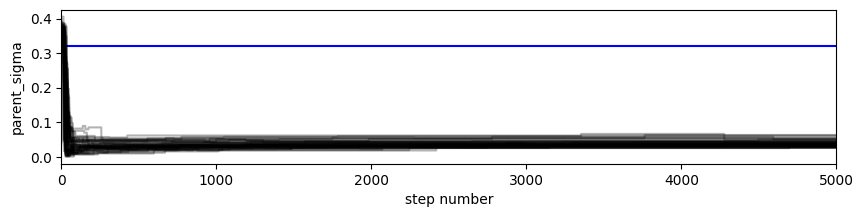

In [13]:
fig, axes = plt.subplots(1, figsize=(10, 2), sharex=True)
samples = sampler.get_chain()
labels = ["parent_sigma"]
plt.hlines(true_scale_parent, 0, len(samples), color='blue')
plt.plot(samples[:, :, 0], "k", alpha=0.3)
plt.xlabel('step number')
plt.ylabel(labels[0])
plt.xlim(0,len(samples))

In [14]:
tau = sampler.get_autocorr_time()
print(tau)

[38.868632]


In [15]:
flat_samples = sampler.get_chain(discard=100, thin=10, flat=True)
print(flat_samples.shape)

(24500, 1)


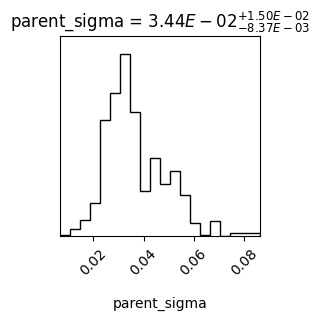

In [9]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_scale_parent], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

## scale is fixed

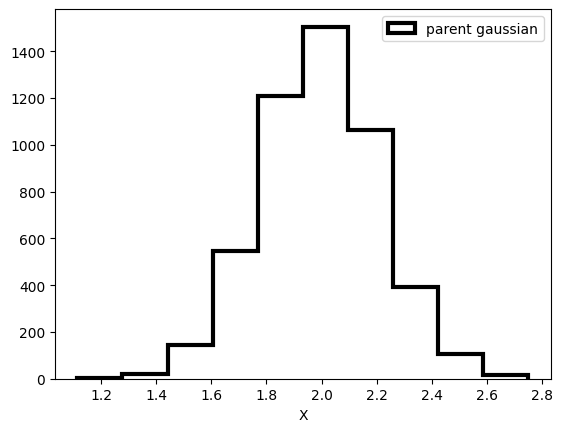

In [1]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent = 2
true_scale_parent = 0.21
true_scale_child = 0.01
N_obs, size_child = 5000, 50

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu, sigma):
    return np.random.normal(loc=mu, scale=sigma, size=N_obs)

parent_data = gen_parent_data(true_mean_parent, true_scale_parent)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian')
plt.xlabel("X")
plt.legend()

(array([1.000e+00, 2.000e+01, 1.430e+02, 5.470e+02, 1.207e+03, 1.505e+03,
        1.063e+03, 3.930e+02, 1.050e+02, 1.600e+01]),
 array([1.11442847, 1.27792915, 1.44142984, 1.60493053, 1.76843121,
        1.9319319 , 2.09543258, 2.25893327, 2.42243396, 2.58593464,
        2.74943533]),
 [<matplotlib.patches.Polygon at 0x7f13279b23b0>])

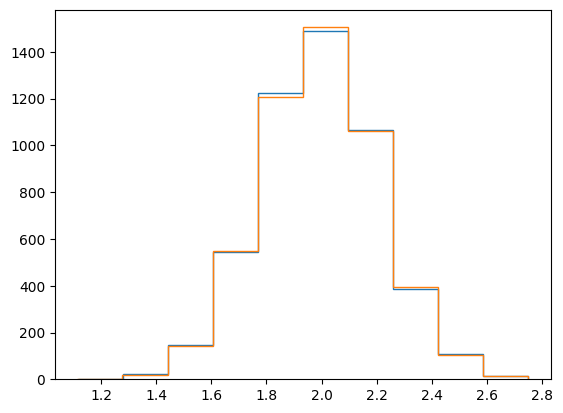

In [2]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step')

In [4]:
def log_liklihood(param):
    parent_mu = param # mu is fixed and so is sigma
    #model = gen_child_data(parent_data=gen_parent_data(parent_mu, parent_sigma))
    model = true_scale_parent * np.random.randn(N_obs) + parent_mu
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_gaussian_prior(param):
    parent_mu = param
    if (0 < parent_mu < 5):
        return 0.0 # log(1) 0
    return -np.inf # log(0) -inf

def log_probability(param):
    lp = log_gaussian_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [5]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_mean_parent]) + 0.1 * np.random.randn(1)
soln = minimize(nll, initial)
parent_sigma_ML = soln.x

print("Maximum likelihood estimates:")
print("sigma = {0:.3f}".format(soln.x[0]))

Maximum likelihood estimates:
sigma = 2.050


In [14]:
import emcee

pos = soln.x[0] + 1e-1 * np.random.randn(50, 1)
nwalkers, ndim = pos.shape

from multiprocessing import Pool

#with Pool() as pool:
sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability#, pool=pool
    )
sampler.run_mcmc(pos, 10000, progress=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:29<00:00, 112.34it/s]


State([[2.01249647]
 [1.993095  ]
 [2.00384413]
 [1.9964873 ]
 [2.00070844]
 [1.98766223]
 [2.01279045]
 [2.0106896 ]
 [2.00235497]
 [2.01480887]
 [1.99145753]
 [2.00095048]
 [1.99727972]
 [1.97156126]
 [1.99693834]
 [2.01164141]
 [2.00964966]
 [1.98469879]
 [1.99999204]
 [1.98741157]
 [1.99593327]
 [1.99460413]
 [2.00230629]
 [2.01135471]
 [2.01650014]
 [2.01061805]
 [1.97033531]
 [1.9771831 ]
 [2.01170305]
 [1.99444355]
 [2.00130317]
 [2.0060404 ]
 [2.01532116]
 [1.99989203]
 [1.9911241 ]
 [1.99996064]
 [1.99915622]
 [1.983395  ]
 [2.00367132]
 [1.99815173]
 [2.01095409]
 [1.9932482 ]
 [2.00559337]
 [2.01766385]
 [2.01594904]
 [2.01090092]
 [1.97423248]
 [2.02550901]
 [1.99207622]
 [2.00484418]], log_prob=[-2040182.57217318 -2020952.86868901 -2050448.6929004  -2044555.8582443
 -2052558.02957912 -2050263.14900221 -2062335.58648929 -2051781.99604696
 -2049158.62618504 -2070328.83761648 -2034402.59054278 -2058114.25751695
 -2039040.25477717 -2049160.75117531 -2029327.1012635  -2035240.9

(0.0, 10000.0)

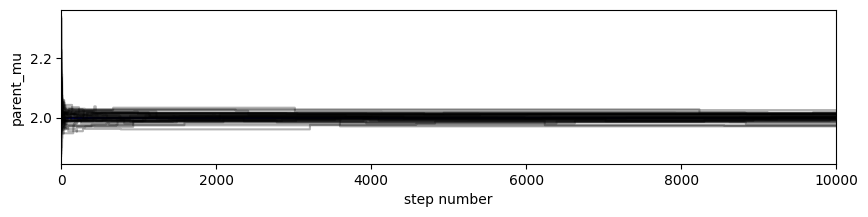

In [15]:
fig, axes = plt.subplots(1, figsize=(10, 2), sharex=True)
samples = sampler.get_chain()
labels = ["parent_mu"]
plt.hlines(true_mean_parent, 0, len(samples), color='blue')
plt.plot(samples[:, :, 0], "k", alpha=0.3)
plt.xlabel('step number')
plt.ylabel(labels[0])
plt.xlim(0,len(samples))

In [16]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [917.70898436]

In [17]:
flat_samples = sampler.get_chain(discard=100, thin=10, flat=True)
print(flat_samples.shape)

(49500, 1)


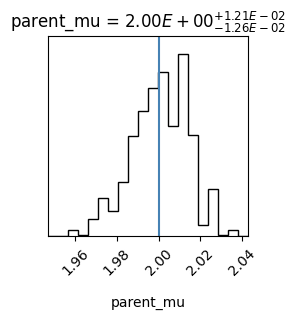

In [18]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_mean_parent], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

## all varying 

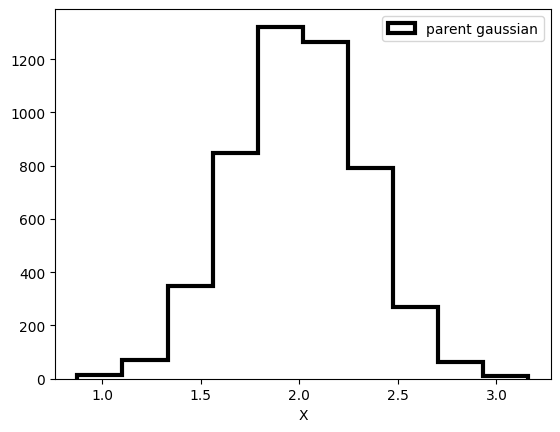

In [1]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent = 2
true_scale_parent = 0.32
true_scale_child = 0.01
N_obs, size_child = 5000, 50

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu, sigma):
    return np.random.normal(loc=mu, scale=sigma, size=N_obs)

parent_data = gen_parent_data(true_mean_parent, true_scale_parent)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian')
plt.xlabel("X")
plt.legend()

(array([  13.,   69.,  348.,  847., 1322., 1266.,  790.,  271.,   64.,
          10.]),
 array([0.87536761, 1.10396412, 1.33256064, 1.56115716, 1.78975367,
        2.01835019, 2.2469467 , 2.47554322, 2.70413974, 2.93273625,
        3.16133277]),
 [<matplotlib.patches.Polygon at 0x7efe48e48520>])

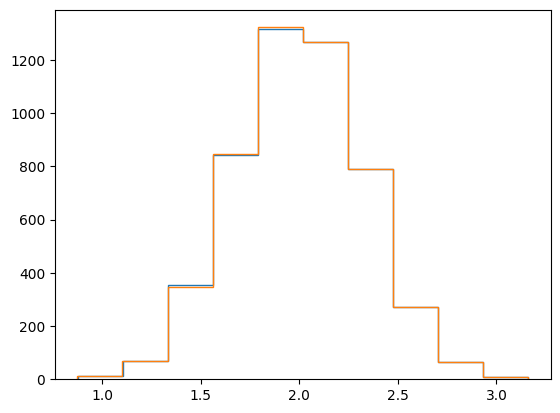

In [2]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step')

In [3]:
def log_liklihood(param):
    parent_mu, parent_sigma = param # mu is fixed and so is sigma
    #model = gen_child_data(parent_data=gen_parent_data(parent_mu, parent_sigma))
    model = parent_sigma * np.random.randn(N_obs) + parent_mu
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_prior(param):
    parent_mu, parent_sigma = param
    if (true_mean_parent - 5 < parent_mu < true_mean_parent + 5 and 
        0.0 < parent_sigma < 1.0):
        return 0.0
    return -np.inf

def log_probability(param):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [4]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_mean_parent, true_scale_parent]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial)
parent_mu_ML, parent_sigma_ML = soln.x

print("Maximum likelihood estimates:")
print("mu = {0:.3f}".format(parent_mu_ML))
print("sigma = {0:.3f}".format(parent_sigma_ML))

Maximum likelihood estimates:
mu = 2.050
sigma = 0.306


In [5]:
import emcee

pos = soln.x + 1e-2 * np.random.randn(50, 2)
nwalkers, ndim = pos.shape

#from multiprocessing import Pool

#with Pool() as pool:
sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability#, pool=pool
    )
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [00:44<00:00, 111.73it/s]


State([[2.00346817 0.01043506]
 [2.00694926 0.01095952]
 [2.00758117 0.01519431]
 [1.99794697 0.01763564]
 [2.00803778 0.01801869]
 [2.00409683 0.01232381]
 [2.00518279 0.01369705]
 [2.00478958 0.01114352]
 [2.00162332 0.01207721]
 [2.00327641 0.01357449]
 [2.00435681 0.00972788]
 [2.00084042 0.01567464]
 [2.00819107 0.01109031]
 [2.00249053 0.01161884]
 [2.00754372 0.01814109]
 [2.00631969 0.0107554 ]
 [2.00553727 0.00992577]
 [2.00564068 0.01698099]
 [2.00541449 0.01494525]
 [2.00520918 0.01401657]
 [2.00558    0.01004319]
 [2.00568039 0.01512299]
 [2.00726981 0.01025671]
 [2.00245887 0.01500093]
 [2.00663646 0.00837183]
 [2.00251393 0.01253046]
 [2.00102889 0.0119588 ]
 [2.00293485 0.01099207]
 [2.0017038  0.01220163]
 [2.00172346 0.01018023]
 [2.0004394  0.01154256]
 [2.00496687 0.01174684]
 [2.00261791 0.00831351]
 [2.00535925 0.00764099]
 [2.00613546 0.01486634]
 [2.00390715 0.01530027]
 [2.00549247 0.01525446]
 [2.00410606 0.0100521 ]
 [2.00501477 0.01453523]
 [2.00430763 0.0110

Text(0.5, 0, 'step number')

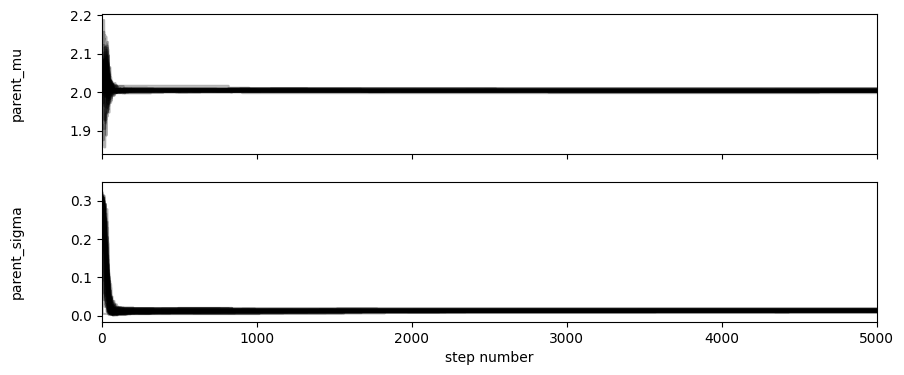

In [6]:
fig, axes = plt.subplots(2, figsize=(10, 4), sharex=True)
samples = sampler.get_chain()
labels = ["parent_mu", "parent_sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [7]:
tau = sampler.get_autocorr_time()
print(tau)

[66.29669836 39.66875309]


In [8]:
flat_samples = sampler.get_chain(discard=100, thin=10, flat=True)
print(flat_samples.shape)

(24500, 2)


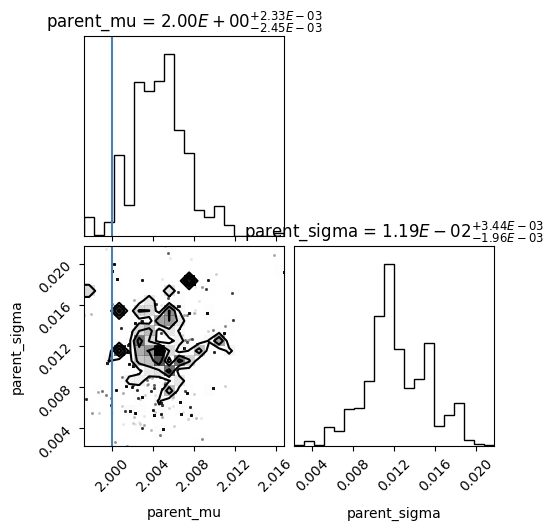

In [9]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_mean_parent, true_scale_parent], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

# Parent (Bimodal) - Child (Gaussians)

## mean of Child is derived from the Parent distribution

the trick used here is that fitting the child data for only the mean and the scale and not the whole child data

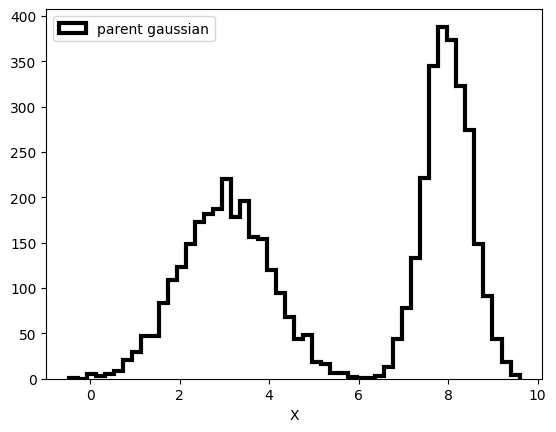

In [10]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent_A = 3
true_scale_parent_A = 1
true_mean_parent_B = 8
true_scale_parent_B = .5
true_scale_child = 0.01
N_obs, size_child = 5000, 10

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu_A, sigma_A, mu_B, sigma_B):
    return np.concatenate((np.random.normal(loc=mu_A, scale=sigma_A, size=N_obs//2), 
                           np.random.normal(loc=mu_B, scale=sigma_B, size=N_obs//2)), axis=0)

parent_data = gen_parent_data(true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian', bins=50)
plt.xlabel("X")
plt.legend()

(array([  1.,   0.,   5.,   3.,   5.,   8.,  21.,  29.,  47.,  47.,  83.,
        109., 123., 149., 173., 182., 187., 220., 178., 196., 156., 154.,
        120.,  94.,  68.,  44.,  48.,  18.,  16.,   6.,   6.,   2.,   1.,
          1.,   3.,  13.,  44.,  78., 133., 221., 345., 388., 373., 323.,
        274., 148.,  91.,  44.,  18.,   4.]),
 array([-0.4775555 , -0.27609539, -0.07463529,  0.12682482,  0.32828492,
         0.52974503,  0.73120513,  0.93266524,  1.13412534,  1.33558545,
         1.53704555,  1.73850566,  1.93996576,  2.14142586,  2.34288597,
         2.54434607,  2.74580618,  2.94726628,  3.14872639,  3.35018649,
         3.5516466 ,  3.7531067 ,  3.95456681,  4.15602691,  4.35748702,
         4.55894712,  4.76040723,  4.96186733,  5.16332744,  5.36478754,
         5.56624765,  5.76770775,  5.96916786,  6.17062796,  6.37208807,
         6.57354817,  6.77500828,  6.97646838,  7.17792848,  7.37938859,
         7.58084869,  7.7823088 ,  7.9837689 ,  8.18522901,  8.38668911,
 

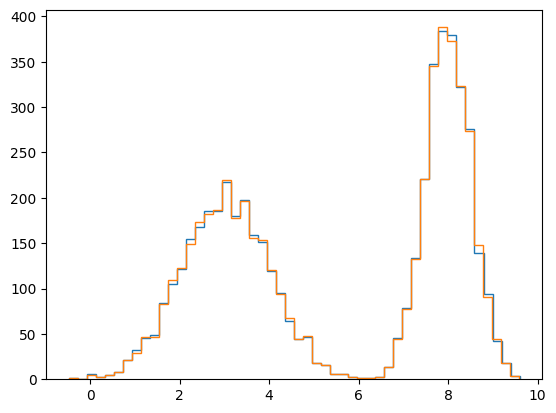

In [11]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step',bins=50)
plt.hist(parent_data, fill=False, histtype='step',bins=50)

In [12]:
def log_liklihood(param):
    parent_mu_A, parent_sigma_A, parent_mu_B, parent_sigma_B  = param # mu is fixed and so is sigma
    #model = gen_child_data(parent_data=gen_parent_data(parent_mu, parent_sigma))
    model = np.concatenate((parent_sigma_A * np.random.randn(N_obs//2) + parent_mu_A,
                            parent_sigma_B * np.random.randn(N_obs//2) + parent_mu_B),
                            axis=0)
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_prior(param):
    parent_mu_A, parent_sigma_A, parent_mu_B, parent_sigma_B = param
    if (true_mean_parent_A - 5 < parent_mu_A < true_mean_parent_A + 5 and 
        0.0 < parent_sigma_A < 2 and
        true_mean_parent_B - 5 < parent_mu_B < true_mean_parent_B + 5 and 
        0.0 < parent_sigma_B < 2):
        return 0.0
    return -np.inf

def log_probability(param):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [13]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B]) + 0.1 * np.random.randn(4)
soln = minimize(nll, initial)
parent_mu_A_ML, parent_sigma_A_ML, parent_mu_B_ML, parent_sigma_B_ML = soln.x

print("Maximum likelihood estimates:")
print("mu_A = {0:.3f}".format(parent_mu_A_ML))
print("sigma_A = {0:.3f}".format(parent_sigma_A_ML))
print("mu_B = {0:.3f}".format(parent_mu_B_ML))
print("sigma_B = {0:.3f}".format(parent_sigma_B_ML))

Maximum likelihood estimates:
mu_A = 3.050
sigma_A = 0.986
mu_B = 8.065
sigma_B = 0.652


In [14]:
import emcee

pos = soln.x + 1e-2 * np.random.randn(50, 4)
nwalkers, ndim = pos.shape

#from multiprocessing import Pool

#with Pool() as pool:
sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability#, pool=pool
    )
sampler.run_mcmc(pos, 10000, progress=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:08<00:00, 145.73it/s]


State([[3.02756969e+00 3.91901783e-02 8.01187794e+00 2.90353082e-02]
 [3.02774350e+00 4.02732000e-02 8.00189423e+00 2.16773093e-02]
 [3.02873639e+00 4.42064499e-02 8.01185038e+00 7.45531819e-03]
 [3.02221379e+00 4.78260740e-02 8.00501320e+00 1.38371226e-02]
 [3.03198308e+00 3.87032285e-02 8.00508249e+00 2.25281583e-02]
 [3.02013205e+00 3.10859400e-02 8.00471625e+00 2.74683982e-02]
 [3.02440467e+00 3.83913134e-02 8.00654815e+00 1.22549280e-02]
 [3.01754411e+00 4.79713618e-02 8.00887649e+00 1.70478137e-02]
 [3.02274544e+00 3.80510822e-02 8.00501417e+00 1.51338547e-02]
 [3.02198806e+00 4.35952643e-02 7.98334564e+00 7.22032437e-03]
 [3.01454220e+00 2.70430592e-02 7.99192350e+00 1.97122555e-02]
 [3.01687579e+00 4.84326531e-02 8.01403144e+00 1.67522739e-02]
 [3.01508852e+00 4.82495361e-02 8.00860233e+00 1.30290156e-02]
 [3.02275110e+00 4.18907619e-02 8.00029850e+00 2.43472696e-02]
 [3.01712218e+00 4.71547260e-02 8.01780179e+00 6.14278820e-04]
 [3.02594228e+00 3.32456695e-02 8.00648333e+00 2.

Text(0.5, 0, 'step number')

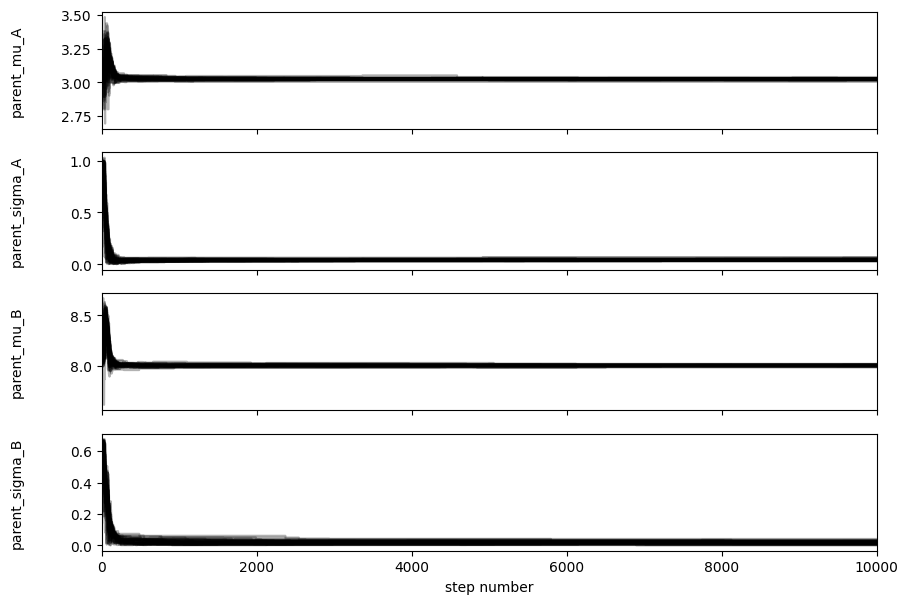

In [15]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["parent_mu_A", "parent_sigma_A", "parent_mu_B", "parent_sigma_B"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [16]:
tau = sampler.get_autocorr_time()
print(tau)

[175.31666819  74.53556848 108.02447565 135.73832328]


In [17]:
flat_samples = sampler.get_chain(discard=200, thin=15, flat=True)
print(flat_samples.shape)

(32650, 4)


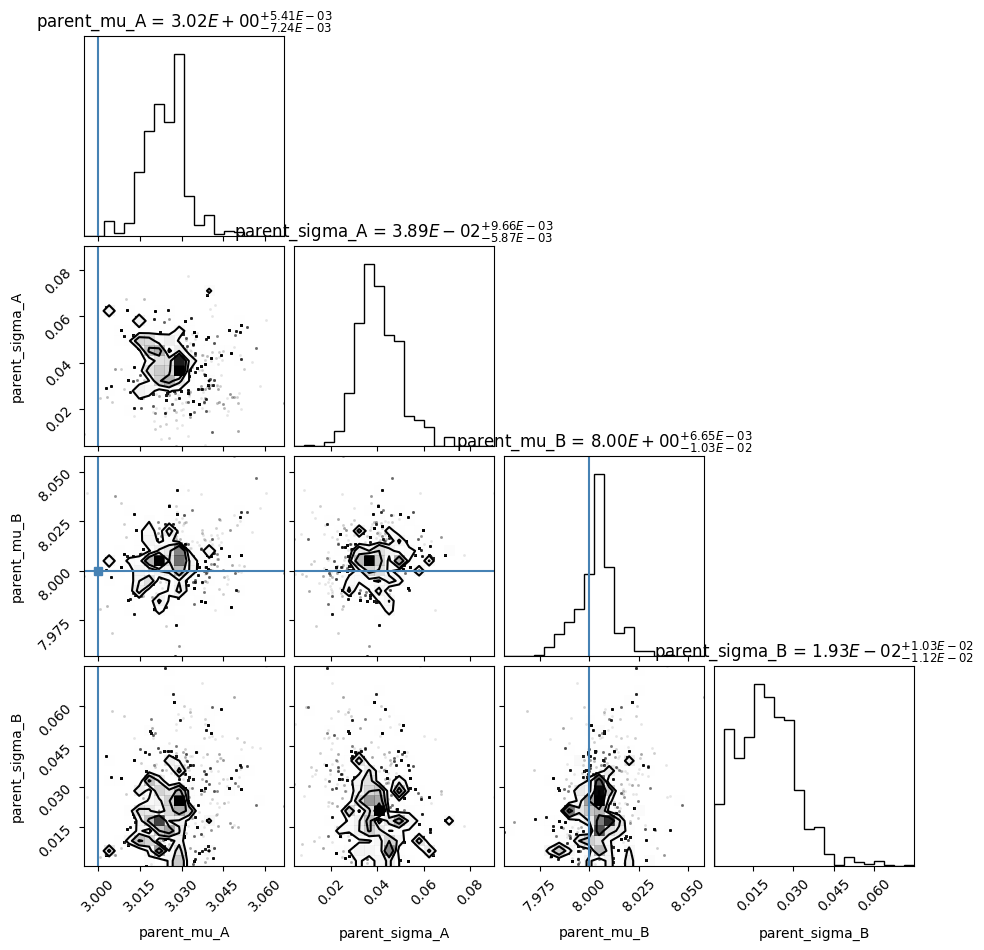

In [18]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

# Parent (Mixed Gaussian) - Child (Gaussians)

## FIX SCALE

0.3415654694982557 0.23733789675518757 0.06771925307135529


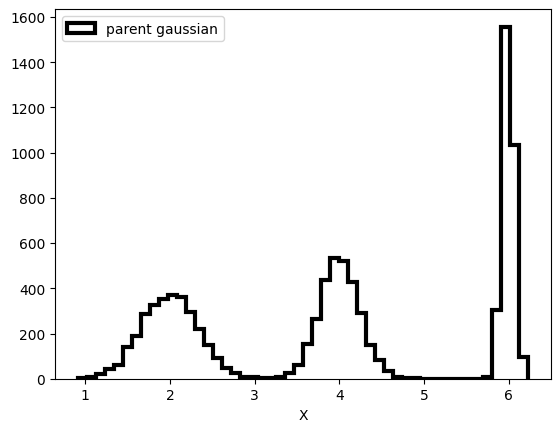

In [19]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent_A, true_mean_parent_B, true_mean_parent_C = 2, 4, 6
true_scale_parent_A, true_scale_parent_B, true_scale_parent_C = np.random.random(3)

print(true_mean_parent_A, true_mean_parent_B, true_mean_parent_C,
      true_scale_parent_A, true_scale_parent_B, true_scale_parent_C)

true_scale_child = 0.01

N_obs, size_child = 9000, 10

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu_A, sigma_A, mu_B, sigma_B, mu_C, sigma_C):
    return np.concatenate((np.random.normal(loc=mu_A, scale=sigma_A, size=N_obs//3), 
                           np.random.normal(loc=mu_B, scale=sigma_B, size=N_obs//3),
                           np.random.normal(loc=mu_C, scale=sigma_C, size=N_obs//3)), axis=0)

parent_data = gen_parent_data(true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B, true_mean_parent_C, true_scale_parent_C)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian', bins=50)
plt.xlabel("X")
plt.legend()

(array([3.000e+00, 7.000e+00, 2.100e+01, 4.300e+01, 6.200e+01, 1.390e+02,
        1.900e+02, 2.880e+02, 3.240e+02, 3.530e+02, 3.700e+02, 3.600e+02,
        2.940e+02, 2.190e+02, 1.490e+02, 9.000e+01, 4.600e+01, 2.400e+01,
        9.000e+00, 7.000e+00, 3.000e+00, 2.000e+00, 8.000e+00, 2.400e+01,
        5.900e+01, 1.530e+02, 2.640e+02, 4.380e+02, 5.350e+02, 5.220e+02,
        4.290e+02, 2.900e+02, 1.490e+02, 8.200e+01, 3.300e+01, 7.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 3.040e+02, 1.557e+03,
        1.036e+03, 9.700e+01]),
 array([0.90817858, 1.0146592 , 1.12113982, 1.22762044, 1.33410106,
        1.44058168, 1.5470623 , 1.65354291, 1.76002353, 1.86650415,
        1.97298477, 2.07946539, 2.18594601, 2.29242663, 2.39890725,
        2.50538787, 2.61186848, 2.7183491 , 2.82482972, 2.93131034,
        3.03779096, 3.14427158, 3.2507522 , 3.35723282, 3.46371344,
        3.57019405, 3.67667467, 3.78

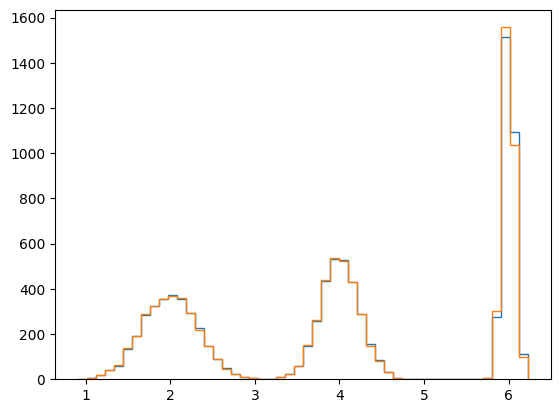

In [20]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step',bins=50)
plt.hist(parent_data, fill=False, histtype='step',bins=50)

In [21]:
def log_liklihood(param):
    parent_mean_A, parent_mean_B, parent_mean_C  = param 
    model = np.concatenate((true_scale_parent_A * np.random.randn(N_obs//3) + parent_mean_A,
                            true_scale_parent_B * np.random.randn(N_obs//3) + parent_mean_B,
                            true_scale_parent_C * np.random.randn(N_obs//3) + parent_mean_C),
                            axis=0)
    
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_prior(param):
    parent_mean_A, parent_mean_B, parent_mean_C = param
    if (true_mean_parent_A - 2< parent_mean_A < true_mean_parent_A + 2 and
        true_mean_parent_B - 2 < parent_mean_B < true_mean_parent_B + 2 and
        true_mean_parent_C - 2 < parent_mean_C < true_mean_parent_C + 2):
        return 0.0
    return -np.inf

def log_probability(param):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [22]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_mean_parent_A, true_mean_parent_B, true_mean_parent_C]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial)
parent_mu_A_ML, parent_mu_B_ML, parent_mu_C_ML = soln.x

print("Maximum likelihood estimates:")
print("sigma_A = {0:.3f}".format(parent_mu_A_ML))
print("sigma_B = {0:.3f}".format(parent_mu_B_ML))
print("sigma_C = {0:.3f}".format(parent_mu_C_ML))


Maximum likelihood estimates:
sigma_A = 2.050
sigma_B = 3.986
sigma_C = 6.065


In [23]:
import emcee

pos = soln.x + 1e-2 * np.random.randn(50, 3)
nwalkers, ndim = pos.shape

from multiprocessing import Pool

with Pool() as pool:
    sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability, pool=pool
    )
    sampler.run_mcmc(pos, 10000, progress=True)

100%|██████████| 10000/10000 [00:39<00:00, 252.24it/s]


Text(0.5, 0, 'step number')

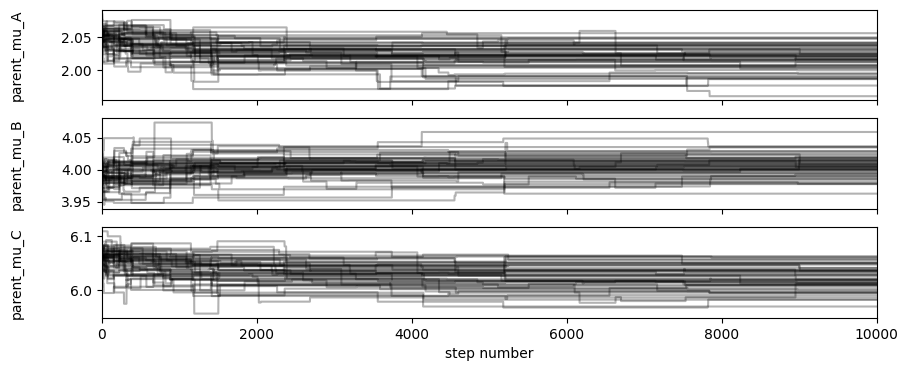

In [24]:
fig, axes = plt.subplots(3, figsize=(10, 4), sharex=True)
samples = sampler.get_chain()
labels = ["parent_mu_A", "parent_mu_B", "parent_mu_C"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [25]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [1074.01696639  993.43607096 1101.36174551]

In [ ]:
flat_samples = sampler.get_chain(discard=300, thin=15, flat=True)
print(flat_samples.shape)

(32300, 3)


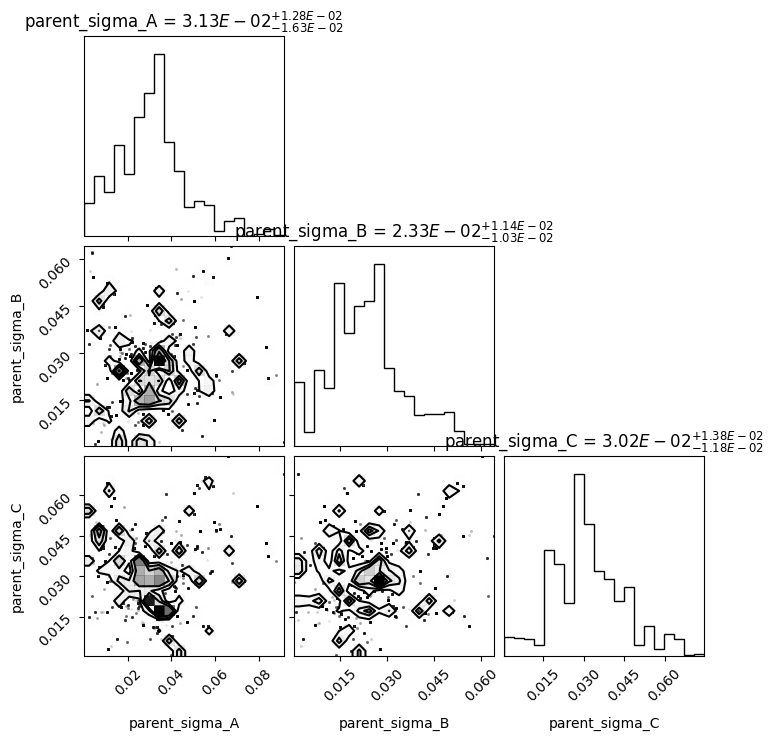

In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_mean_parent_A, true_mean_parent_B, true_mean_parent_C], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)

## ALL VARYING 

2 4 6 0.19025052895238437 0.469324789659179 0.5541674549224924


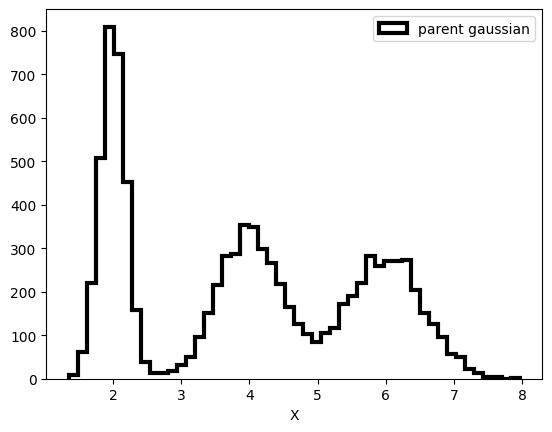

In [27]:
import numpy as np
import matplotlib.pyplot as plt

true_mean_parent_A, true_mean_parent_B, true_mean_parent_C = 2, 4, 6
true_scale_parent_A, true_scale_parent_B, true_scale_parent_C = np.random.random(3)

print(true_mean_parent_A, true_mean_parent_B, true_mean_parent_C,
      true_scale_parent_A, true_scale_parent_B, true_scale_parent_C)

true_scale_child = 0.01

N_obs, size_child = 9000, 5

def gen_child_data(parent_data):
    return np.random.normal(loc=parent_data[:, np.newaxis], scale=true_scale_child, size=(N_obs, size_child))

def gen_parent_data(mu_A, sigma_A, mu_B, sigma_B, mu_C, sigma_C):
    return np.concatenate((np.random.normal(loc=mu_A, scale=sigma_A, size=N_obs//3), 
                           np.random.normal(loc=mu_B, scale=sigma_B, size=N_obs//3),
                           np.random.normal(loc=mu_C, scale=sigma_C, size=N_obs//3)), axis=0)

parent_data = gen_parent_data(true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B, true_mean_parent_C, true_scale_parent_C)
child_data = gen_child_data(parent_data)

#for i in range(N_obs):
#    plt.hist(child_data[i], fill=False, histtype='step')
plt.hist(parent_data, fill=False, histtype='step', color='black',linewidth=3, label='parent gaussian', bins=50)
plt.xlabel("X")
plt.legend()

(array([  8.,  61., 221., 508., 809., 746., 451., 157.,  38.,  13.,  14.,
         17.,  32.,  50.,  95., 150., 216., 281., 286., 353., 348., 297.,
        266., 217., 164., 126., 102.,  85., 104., 117., 172., 191., 221.,
        283., 259., 270., 271., 274., 203., 151., 125.,  96.,  57.,  51.,
         22.,  14.,   3.,   3.,   0.,   2.]),
 array([1.35045202, 1.48264745, 1.61484287, 1.7470383 , 1.87923373,
        2.01142915, 2.14362458, 2.27582001, 2.40801543, 2.54021086,
        2.67240629, 2.80460171, 2.93679714, 3.06899257, 3.20118799,
        3.33338342, 3.46557885, 3.59777428, 3.7299697 , 3.86216513,
        3.99436056, 4.12655598, 4.25875141, 4.39094684, 4.52314226,
        4.65533769, 4.78753312, 4.91972854, 5.05192397, 5.1841194 ,
        5.31631483, 5.44851025, 5.58070568, 5.71290111, 5.84509653,
        5.97729196, 6.10948739, 6.24168281, 6.37387824, 6.50607367,
        6.63826909, 6.77046452, 6.90265995, 7.03485537, 7.1670508 ,
        7.29924623, 7.43144166, 7.56363708, 7.

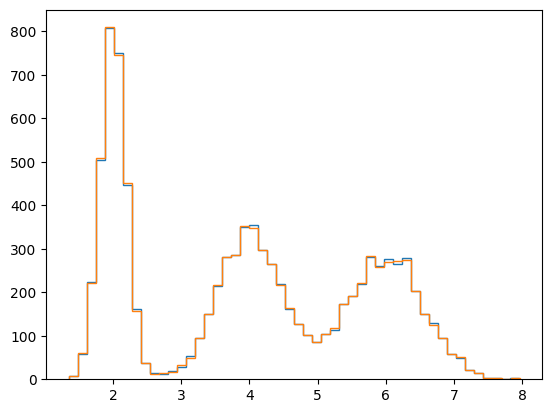

In [28]:
plt.hist(child_data.mean(axis=1),fill=False, histtype='step',bins=50)
plt.hist(parent_data, fill=False, histtype='step',bins=50)

In [29]:
def log_liklihood(param):
    parent_mu_A, parent_sigma_A, parent_mu_B, parent_sigma_B, parent_mu_C, parent_sigma_C  = param 
    #model = gen_child_data(parent_data=gen_parent_data(parent_mu, parent_sigma))
    model = np.concatenate((parent_sigma_A * np.random.randn(N_obs//3) + parent_mu_A,
                            parent_sigma_B * np.random.randn(N_obs//3) + parent_mu_B,
                            parent_sigma_C * np.random.randn(N_obs//3) + parent_mu_C),
                            axis=0)
    
    return -0.5 * np.sum(np.log(2 * np.pi * true_scale_child**2) + (child_data.mean(axis=1) - model)**2 / true_scale_child**2)

def log_prior(param):
    parent_mu_A, parent_sigma_A, parent_mu_B, parent_sigma_B, parent_mu_C, parent_sigma_C = param
    if (true_mean_parent_A - 2 < parent_mu_A < true_mean_parent_A + 2 and 
        0.0 < parent_sigma_A < 1 and
        true_mean_parent_B - 2 < parent_mu_B < true_mean_parent_B + 2 and 
        0.0 < parent_sigma_B < 1 and
        true_mean_parent_C - 2 < parent_mu_C < true_mean_parent_C + 2 and 
        0.0 < parent_sigma_C < 1):
        return 0.0
    return -np.inf

def log_probability(param):
    lp = log_prior(param)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_liklihood(param)

In [30]:
from scipy.optimize import minimize
np.random.seed(42)
nll = lambda *args: -log_liklihood(*args)
initial = np.array([true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B, true_mean_parent_C, true_scale_parent_C]) + 0.1 * np.random.randn(6)
soln = minimize(nll, initial)
parent_mu_A_ML, parent_sigma_A_ML, parent_mu_B_ML, parent_sigma_B_ML, parent_mu_C_ML, parent_sigma_C_ML = soln.x

print("Maximum likelihood estimates:")
print("mu_A = {0:.3f}".format(parent_mu_A_ML))
print("sigma_A = {0:.3f}".format(parent_sigma_A_ML))
print("mu_B = {0:.3f}".format(parent_mu_B_ML))
print("sigma_B = {0:.3f}".format(parent_sigma_B_ML))
print("mu_C = {0:.3f}".format(parent_mu_C_ML))
print("sigma_C = {0:.3f}".format(parent_sigma_C_ML))


Maximum likelihood estimates:
mu_A = 2.050
sigma_A = 0.176
mu_B = 4.065
sigma_B = 0.622
mu_C = 5.977
sigma_C = 0.531


In [34]:
import emcee

pos = soln.x + 1e-2 * np.random.randn(50, 6)
nwalkers, ndim = pos.shape

#from multiprocessing import Pool

#with Pool() as pool:
sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability, #pool=pool
    )
sampler.run_mcmc(pos, 10000, progress=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:52<00:00, 89.28it/s]


State([[1.99731644e+00 1.46686473e-02 3.99119684e+00 1.46042517e-02
  5.99459992e+00 2.54704168e-02]
 [1.99844028e+00 1.66688705e-02 3.99249345e+00 1.11100163e-02
  5.99285279e+00 2.65585194e-02]
 [1.99941470e+00 9.16586334e-03 3.99127385e+00 7.39415140e-03
  5.98912277e+00 1.74860471e-02]
 [1.99510428e+00 5.10976123e-03 3.98773552e+00 1.62402820e-02
  5.99303555e+00 2.20497081e-02]
 [1.99412239e+00 2.09079665e-02 3.98692821e+00 1.36552937e-02
  5.99560260e+00 3.35204042e-02]
 [2.00160783e+00 1.48456283e-02 3.98382072e+00 1.09514350e-02
  5.99023573e+00 2.09076989e-02]
 [2.00368904e+00 1.59602376e-02 3.98496791e+00 1.13842386e-02
  5.99951672e+00 2.85290894e-02]
 [1.99272560e+00 7.94035423e-03 3.99362652e+00 6.92232170e-03
  6.00379846e+00 4.79431679e-02]
 [1.99954406e+00 1.22433835e-02 3.98591538e+00 1.18006315e-02
  5.99014158e+00 2.07825354e-02]
 [1.99739627e+00 1.69653319e-02 3.98488136e+00 1.64570153e-02
  5.98955166e+00 2.35915328e-02]
 [1.99273204e+00 8.03249611e-03 3.99415911e+

Text(0.5, 0, 'step number')

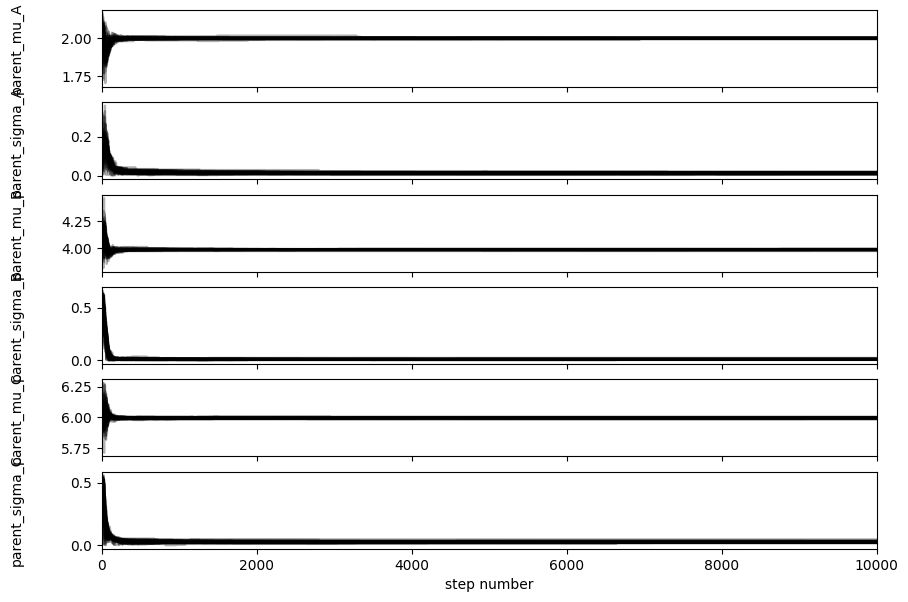

In [35]:
fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["parent_mu_A", "parent_sigma_A", "parent_mu_B", "parent_sigma_B", "parent_mu_C", "parent_sigma_C"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [38]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [ 95.67486273 248.71910301  71.32658778  74.76705542  94.76720847
 101.07990736]

In [43]:
flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
print(flat_samples.shape)

(31650, 6)


ValueError: Provided figure has 36 axes, but data has dimensions K=4

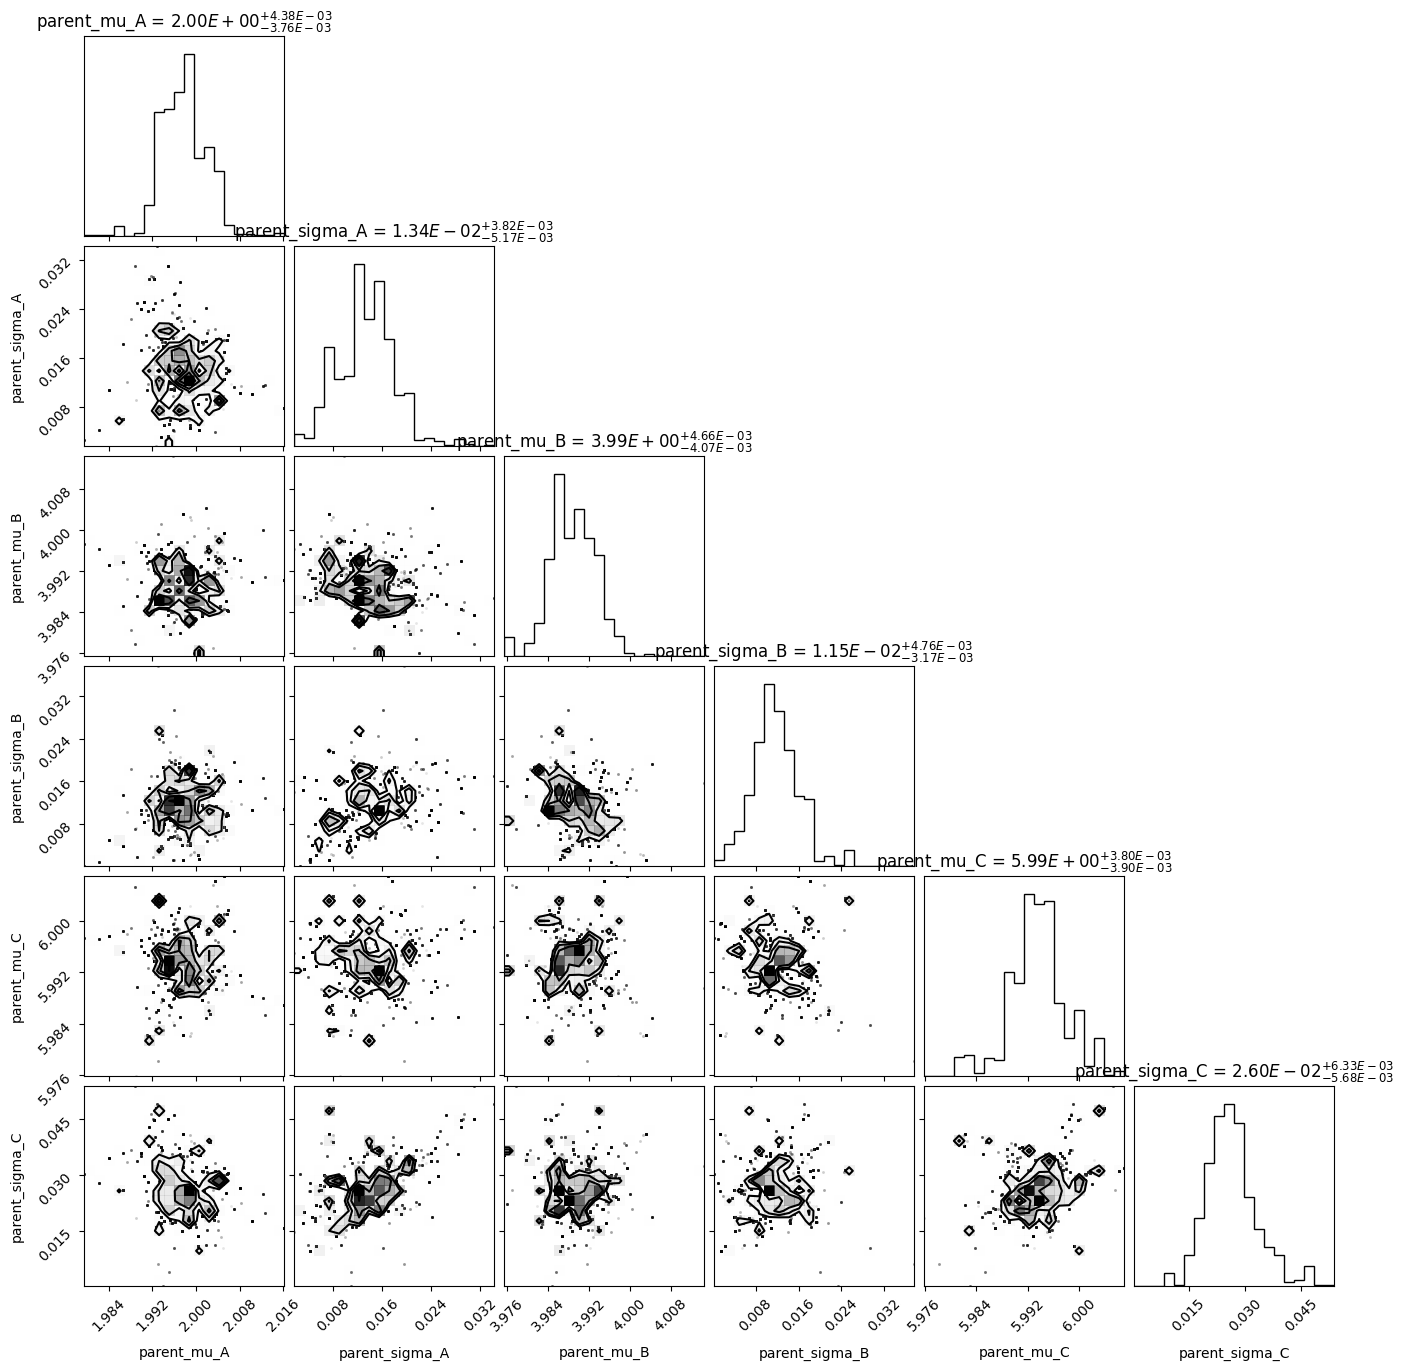

In [44]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[true_mean_parent_A, true_scale_parent_A, true_mean_parent_B, true_scale_parent_B], title_fmt=".2E", show_titles=True, title_kwargs={'fontsize':12}
)